In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score


columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
df = pd.read_csv("heart+disease/processed.cleveland.data", header = None, names = columns )


df = df[~df.isin(['?']).any(axis=1)].reset_index(drop=True)


target = df['target']

df = df.drop('target',axis = 1)

selected_features = ['ca', 'cp', 'oldpeak', 'thal']
X = df[selected_features]
y= target

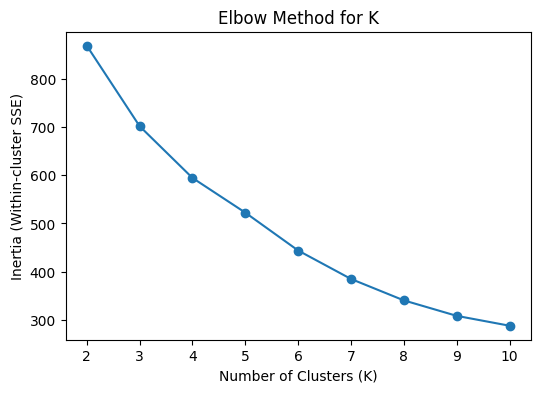

In [2]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.title("Elbow Method for K")
plt.show()

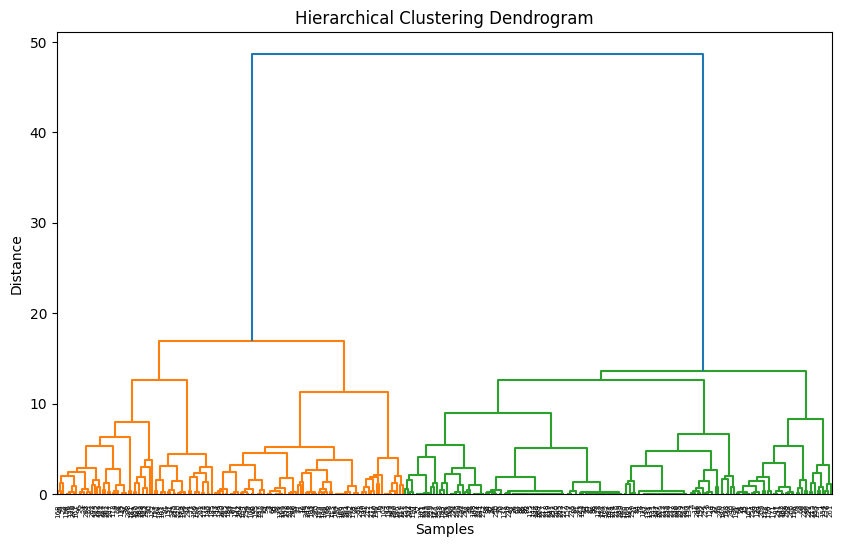

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
linked = linkage(X, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

hc = AgglomerativeClustering(n_clusters=3,  linkage='ward')
df['HC_Cluster'] = hc.fit_predict(X)


In [8]:
ari_kmeans = adjusted_rand_score(target, df['KMeans_Cluster'])
ari_hc = adjusted_rand_score(target, df['HC_Cluster'])

print("Adjusted Rand Index (KMeans vs True Labels):", ari_kmeans)
print("Adjusted Rand Index (Hierarchical vs True Labels):", ari_hc)


sil_kmeans = silhouette_score(X, df['KMeans_Cluster'])
sil_hc = silhouette_score(X, df['HC_Cluster'])

print("Silhouette Score (KMeans):", sil_kmeans)
print("Silhouette Score (Hierarchical):", sil_hc)

Adjusted Rand Index (KMeans vs True Labels): 0.3016548908106877
Adjusted Rand Index (Hierarchical vs True Labels): 0.3077834918526544
Silhouette Score (KMeans): 0.45454822670538025
Silhouette Score (Hierarchical): 0.4378388335941397


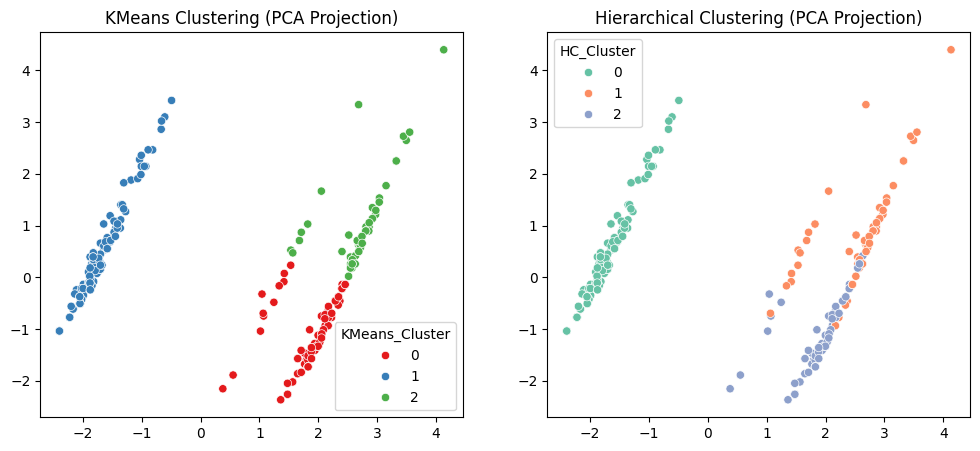

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['KMeans_Cluster'], palette="Set1")
plt.title("KMeans Clustering (PCA Projection)")

plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['HC_Cluster'], palette="Set2")
plt.title("Hierarchical Clustering (PCA Projection)")

plt.show()